## Notebook for running demographics in the City of Los Angeles During COVID

### Demographics featured in this notebook 
1. Income
    - Median Household Income
2. Mode of Transportation
    - Car, Truck
    - Walked 
    - Bicycle
3. Race
    - Black
    - White
    - Asian
    
Note: Each demographic will use this notebook by changing the geopanda file for the basemap. The points of collisions will remain the same in all three demographic sections, using a saved .csv from the cleaned data in the Final_DuringCOVID notebook 

In [1]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import folium

from folium.plugins import MarkerCluster

import plotly.express as px

### Bring in the demographic data from Census Reporter

In [2]:
##NOTE:
#running this notebook three times (once for income, race and mode of transportation)

income = gpd.read_file('acs2019_5yr_B19013_income.geojson')

In [3]:
income.tail()

,geoid,name,B19013001,"B19013001, Error",geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",62142.0,452.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [4]:
income=income.drop([1004])

In [5]:
##Get the columns we need 

income=income[['geoid','geometry','B19013001']]


In [6]:
#Rename the columns

income.columns = ['geoid','geometry','Median Household Income']

In [7]:
income.head(1)

,geoid,geometry,Median Household Income
0,14000US06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",63534.0


In [8]:
income["Median Household Income"].describe()

count       992.000000
mean      68203.515121
std       36642.300370
min        9191.000000
25%       42758.000000
50%       58398.500000
75%       85267.500000
max      250001.000000
Name: Median Household Income, dtype: float64

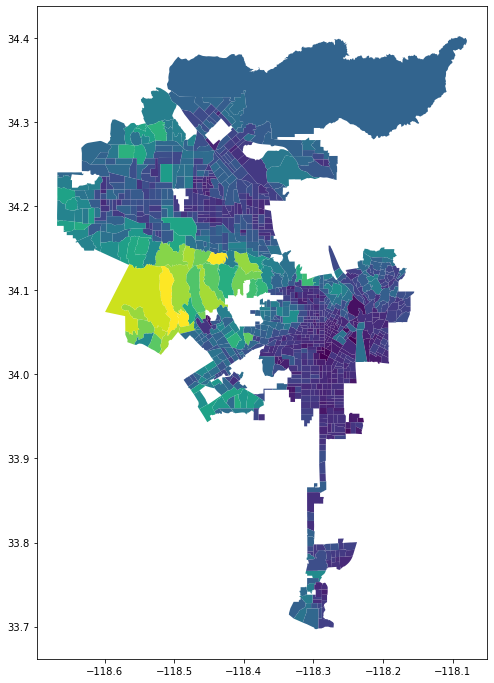

In [9]:
#inital plot! Making sure that there are no outlier areas (ex. the ocean)

income.plot(figsize=(12,12),column="Median Household Income")

In [10]:
income.tail(1)

,geoid,geometry,Median Household Income
1003,14000US06037990200,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325...",NaN


### Bring in the collision data

In [11]:
df = pd.read_csv('df_map.csv')

In [12]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,Date_Occurred,Time_Occurred,Area_ID,Area_Name,MO_Codes,Victim_Age,Victim_Sex,Victim_Descent,Address,Cross_Street,Location,Latitude,Longitude,geometry,Month
0,0,0,2020-03-19,2250,2,Rampart,3101 3401 3701 0605 3029 3036 3004 3026,26.0,Male,"Hispanic, Latin, Mexican",WILLOW BROOK AV,VERMONT AV,"(34.0895, -118.2917)",34.0895,-118.2917,POINT (-13168171.80907068 4040826.029879148),3


In [13]:
#Filter the data 

df = df[['Date_Occurred', 'Time_Occurred', 'Area_Name', 'MO_Codes', 'Victim_Age', 'Victim_Sex', 'Latitude', 'Longitude', 'geometry']]

In [14]:
df = gpd.GeoDataFrame(df, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

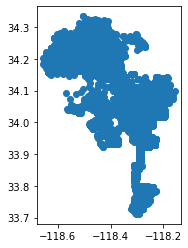

In [15]:
#Plot the points 

df.plot()

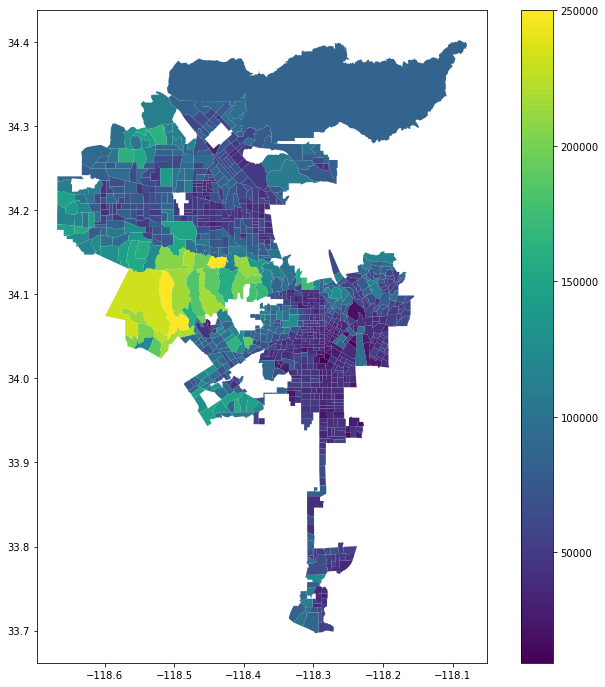

In [18]:
income.plot(figsize=(12,12),legend='true',column='Median Household Income')

In [19]:
# get the bounding box coordinates
minx, miny, maxx, maxy = df.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-118.6561
-118.1554
33.7113
34.3343


In [20]:
# get center lon
center_lon = (maxx-minx)/2+minx
center_lon

-118.40575

In [21]:
# get center lat
center_lat = (maxy-miny)/2+miny
center_lat


34.022800000000004

/opt/conda/lib/python3.8/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


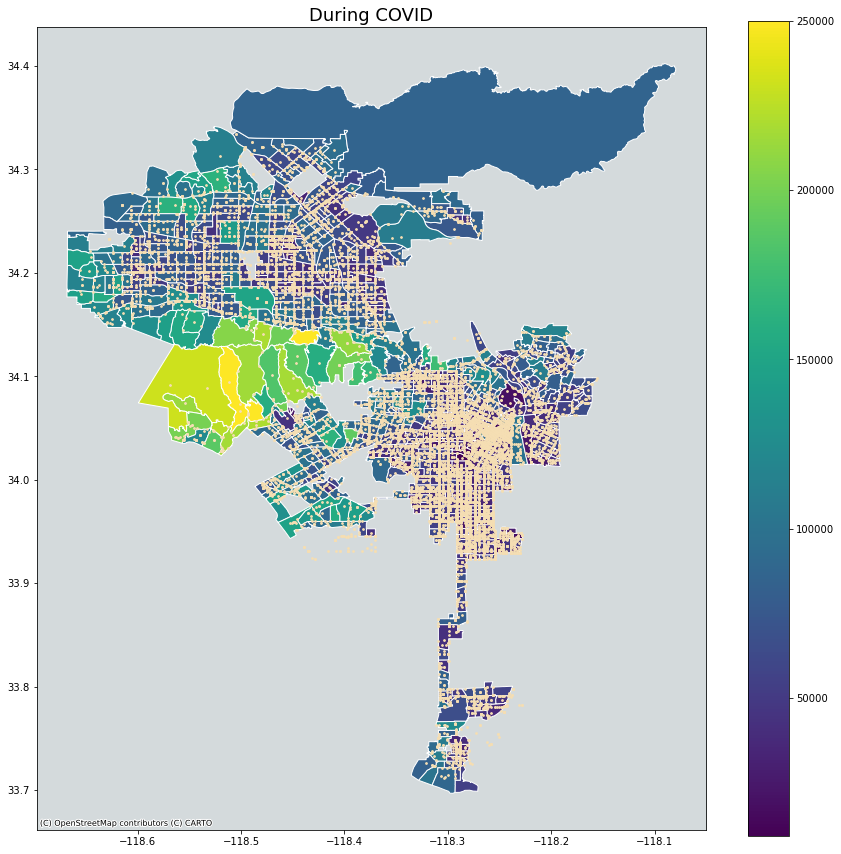

In [22]:
#Put the two together! 

base = income.plot(figsize=(15,15), legend='true', column='Median Household Income', edgecolor='white')
ax = df.plot(ax=base, marker='o', color='wheat', markersize=3)
ax.set_title('During COVID',fontsize=18)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
ax